In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('migr_asyappctza_1_Data.csv')

In [3]:
df.head()

,TIME,GEO,CITIZEN,SEX,AGE,ASYL_APP,UNIT,Value,Flag and Footnotes
0,2009.0,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
1,2010.0,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
2,2011.0,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
3,2012.0,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
4,2013.0,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN


In [4]:
df['TIME']= pd.to_datetime(df['TIME'],format="%Y")

In [5]:
df.head()

,TIME,GEO,CITIZEN,SEX,AGE,ASYL_APP,UNIT,Value,Flag and Footnotes
0,2009-01-01,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
1,2010-01-01,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
2,2011-01-01,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
3,2012-01-01,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN
4,2013-01-01,Austria,Extra-EU28,Total,Total,First time applicant,Person,0,NaN


In [6]:
paises = df['GEO'].unique()

In [7]:
paises.shape
#para achar o que vai fazer drop no array abaixo

(35,)

In [8]:
#df['GEO'].unique()
paises = np.delete(paises, [8,32,34])

In [9]:
paises

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France',
       'Germany (until 1990 former territory of the FRG)', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom'], dtype=object)

In [10]:
df['Value'].head()

0    0
1    0
2    0
3    0
4    0
Name: Value, dtype: object

In [11]:
df['Value']= df['Value'].astype('str')
df['Value']= df['Value'].apply(lambda x : x.replace(",",""))
df['Value']= df['Value'].apply(lambda x : x.replace("nan","0"))
df['Value']= df['Value'].astype('int32')

C:\Users\gabri\Anaconda3\envs\gputensorflow\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


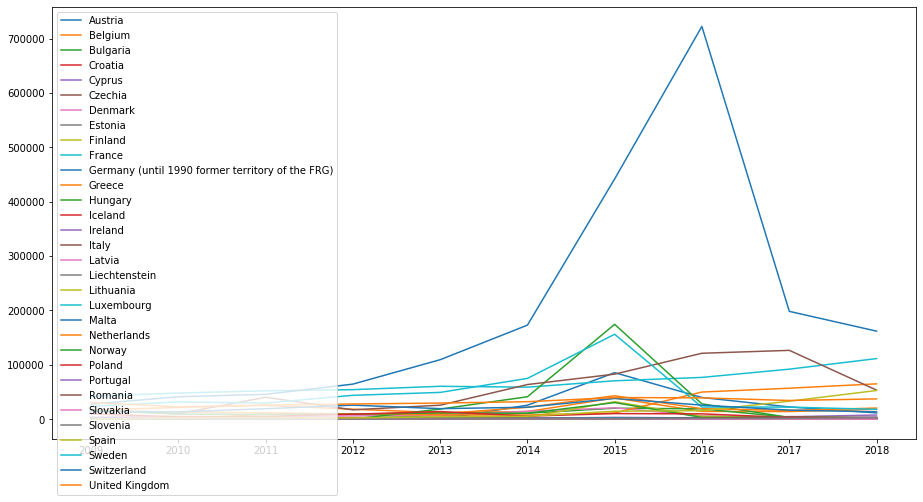

In [12]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_axes([0,0,1,1])
for i in paises:
    ax.plot(df['TIME'][df['GEO']==i],df['Value'][df['GEO']==i], label= i)
    #here I inserted labels and then called them with .legend() fundcion
    ax.legend(loc=2)

In [13]:
# sns.pairplot(df)

In [14]:
pd.pivot_table(df,values="Value",index="GEO",columns=None)
#change columns to ="TIME" if a more complete table is needed

,Value
GEO,
Austria,18509.0
Belgium,19326.5
Bulgaria,6480.5
Croatia,527.0
Cyprus,2903.0
Czechia,831.0
Denmark,7395.0
Estonia,109.0
European Union - 28 countries,557814.0


In [15]:
df2 = pd.read_csv('fertility rate.csv')

In [16]:
df2.head()

,Country Name,2017
0,Aruba,1.886
1,Afghanistan,4.633
2,Angola,5.600
3,Albania,1.638
4,Andorra,NaN


In [17]:
df2[df2['2017']>2]

,Country Name,2017
1,Afghanistan,4.633000
2,Angola,5.600000
5,Arab World,3.276553
7,Argentina,2.275000
14,Burundi,5.502000
16,Benin,4.906000
17,Burkina Faso,5.271000
18,Bangladesh,2.062000
20,Bahrain,2.010000
24,Belize,2.346000


In [18]:
paises2 = ['Syria','Eritrea','Afghanistan','Kosovo','Mali','The Gambia','Nigeria','Somalia']

In [19]:
for i in paises2:
    print(df2['2017'][df2['Country Name']==i])

Series([], Name: 2017, dtype: float64)
67    4.112
Name: 2017, dtype: float64
1    4.633
Name: 2017, dtype: float64
259    2.02
Name: 2017, dtype: float64
156    5.968
Name: 2017, dtype: float64
Series([], Name: 2017, dtype: float64)
172    5.457
Name: 2017, dtype: float64
211    6.168
Name: 2017, dtype: float64
